In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.rcParams["patch.force_edgecolor"]=True

In [2]:
df1 = pd.read_csv('prices-split-adjusted.csv')

In [3]:
df2= pd.read_csv('securities.csv')

In [4]:
df3 =  pd.read_csv('fundamentals.csv')

In [5]:
pd.set_option('max_columns',None)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
date      851264 non-null object
symbol    851264 non-null object
open      851264 non-null float64
close     851264 non-null float64
low       851264 non-null float64
high      851264 non-null float64
volume    851264 non-null float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
Ticker symbol              505 non-null object
Security                   505 non-null object
SEC filings                505 non-null object
GICS Sector                505 non-null object
GICS Sub Industry          505 non-null object
Address of Headquarters    505 non-null object
Date first added           307 non-null object
CIK                        505 non-null int64
dtypes: int64(1), object(7)
memory usage: 31.6+ KB


In [10]:
df2['GICS Sector'].value_counts()

Consumer Discretionary         85
Industrials                    69
Information Technology         68
Financials                     64
Health Care                    59
Consumer Staples               37
Energy                         36
Real Estate                    29
Utilities                      28
Materials                      25
Telecommunications Services     5
Name: GICS Sector, dtype: int64

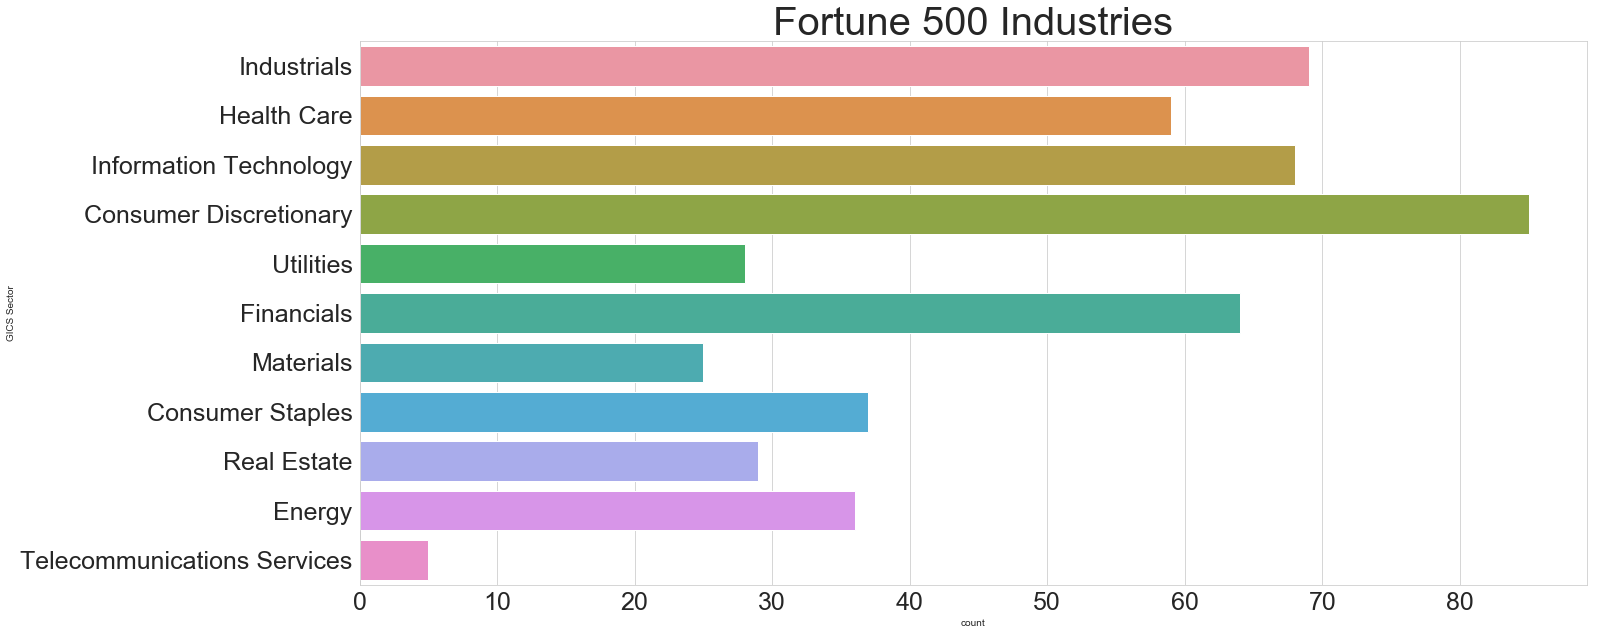

In [11]:
plt.figure(figsize=(22,10))
sns.countplot(y=df2['GICS Sector'])
plt.title('Fortune 500 Industries',fontdict={'fontsize':40})
plt.tick_params(axis='both',labelsize=25)


In [12]:
IT = df2[df2['GICS Sector'] == 'Information Technology']

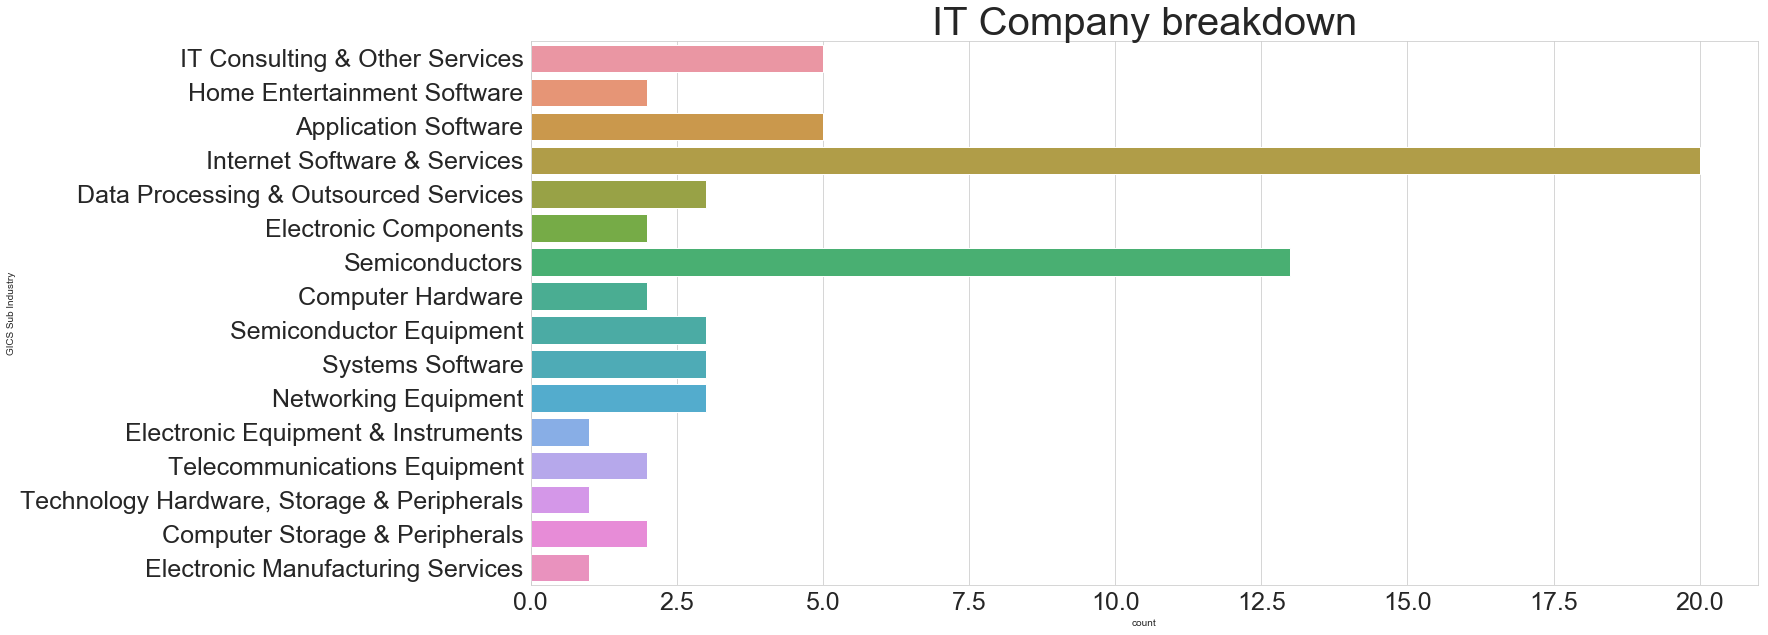

In [13]:
plt.figure(figsize=(22,10))
sns.countplot(y=IT['GICS Sub Industry'])
plt.title('IT Company breakdown',fontdict={'fontsize':40})
plt.tick_params(axis='both',labelsize=25)

In [14]:
IDS =df2[df2['GICS Sector']== 'Industrials']

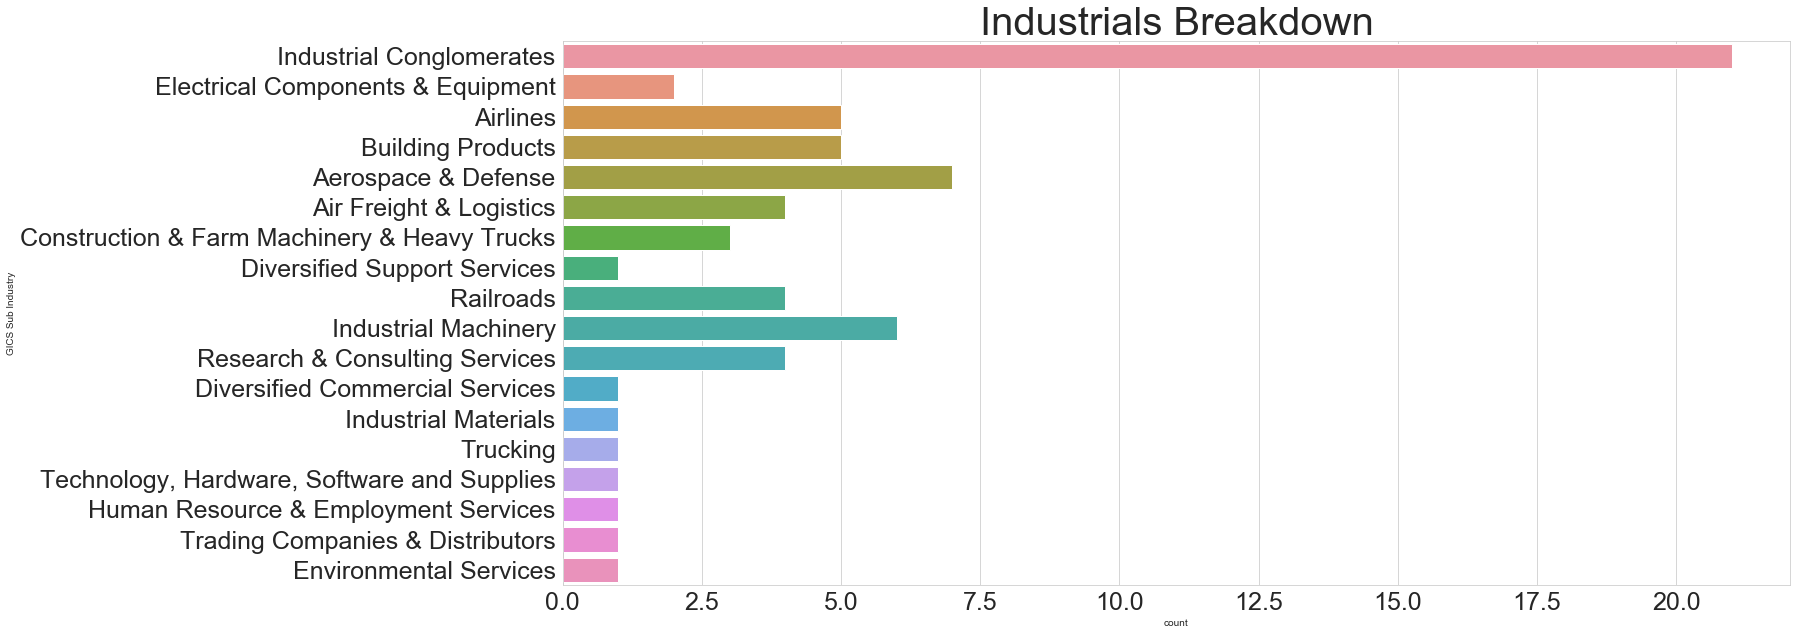

In [15]:
plt.figure(figsize=(22,10))
sns.countplot(y=IDS['GICS Sub Industry'])
plt.title('Industrials Breakdown',fontdict={'fontsize':40})
plt.tick_params(axis='both',labelsize=25)

In [16]:
IDS[IDS['GICS Sub Industry'] == 'Industrial Conglomerates'][['Security', 'Address of Headquarters']]

,Security,Address of Headquarters
0,3M Company,"St. Paul, Minnesota"
132,Danaher Corp.,"Washington, D.C."
156,Eaton Corporation,"Dublin, Ireland"
162,Emerson Electric Company,"Ferguson, Missouri"
205,General Electric,"Fairfield, Connecticut"
230,Honeywell Int'l Inc.,"Morristown, New Jersey"
239,Ingersoll-Rand PLC,"Dublin, Ireland"
251,Jacobs Engineering Group,"Pasadena, California"
268,L-3 Communications Holdings,"New York, New York"
271,Leggett & Platt,"Carthage, Missouri"


In [17]:
## Names of Industrial Congolomerates which dominate the Industrials market

In [18]:
HC = df2[df2['GICS Sector'] == 'Health Care']

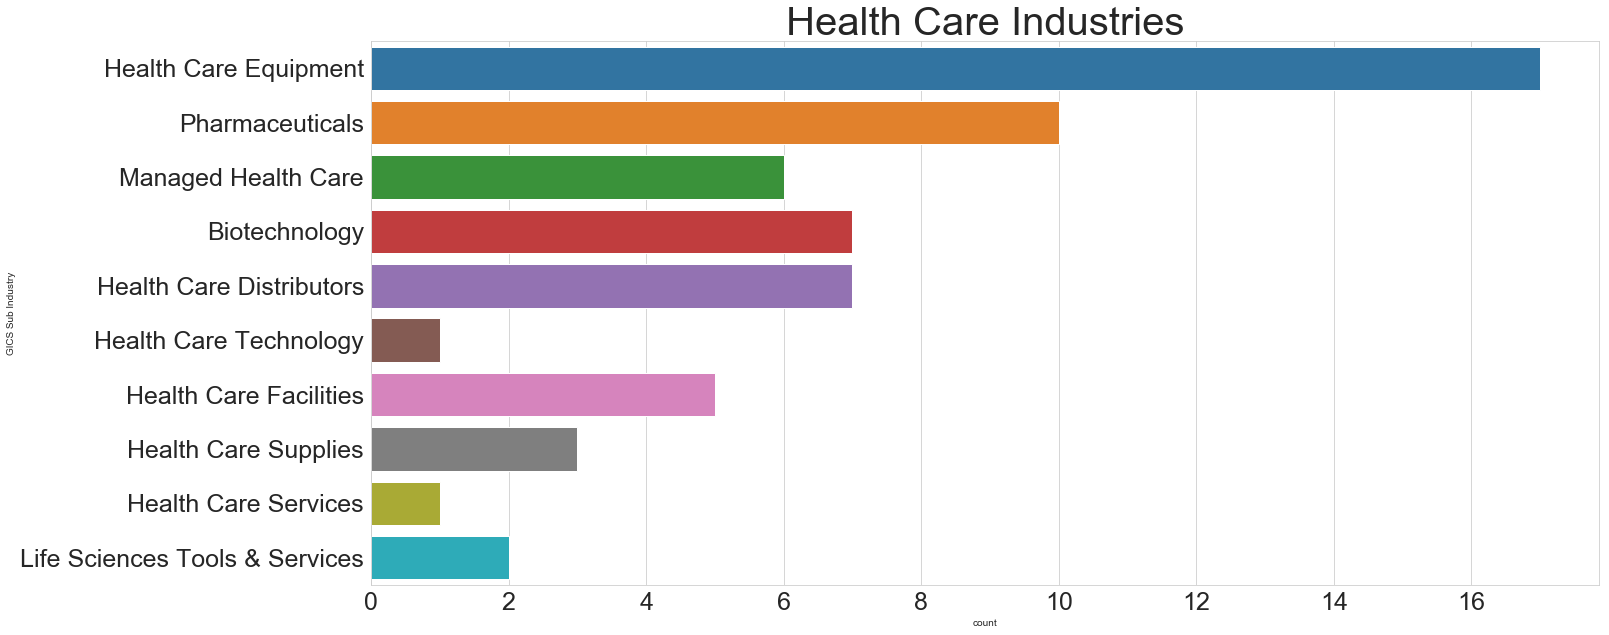

In [19]:
plt.figure(figsize=(22,10))
sns.countplot(y=HC['GICS Sub Industry'])
plt.title('Health Care Industries',fontdict={'fontsize':40})
plt.tick_params(axis='both',labelsize=25)

In [21]:
TR = df3.nlargest(50,columns='Total Revenue',keep='first')

In [22]:
TR1= TR[['Ticker Symbol','Total Revenue']]

In [23]:
TR1=TR1.drop_duplicates('Ticker Symbol').head(10)
TR1

,Ticker Symbol,Total Revenue
1708,WMT,4.856510e+11
1745,XOM,4.515090e+11
10,AAPL,2.337150e+11
420,CVX,2.305900e+11
1042,MCK,1.908840e+11
1597,UNH,1.848400e+11
1312,PSX,1.792900e+11
419,CVS,1.775260e+11
703,GM,1.663800e+11
611,F,1.518000e+11


In [24]:
Tick = df2[['Ticker symbol','Security']]

In [25]:
Tick.rename(columns={"Ticker symbol": "Ticker Symbol"},inplace=True)

/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [28]:
top=TR1.merge(Tick, on='Ticker Symbol')

In [29]:
top['Total Revenue'].astype(float)

0    4.856510e+11
1    4.515090e+11
2    2.337150e+11
3    2.305900e+11
4    1.908840e+11
5    1.848400e+11
6    1.792900e+11
7    1.775260e+11
8    1.663800e+11
9    1.518000e+11
Name: Total Revenue, dtype: float64

In [30]:
top.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 3 columns):
Ticker Symbol    10 non-null object
Total Revenue    10 non-null float64
Security         10 non-null object
dtypes: float64(1), object(2)
memory usage: 640.0+ bytes


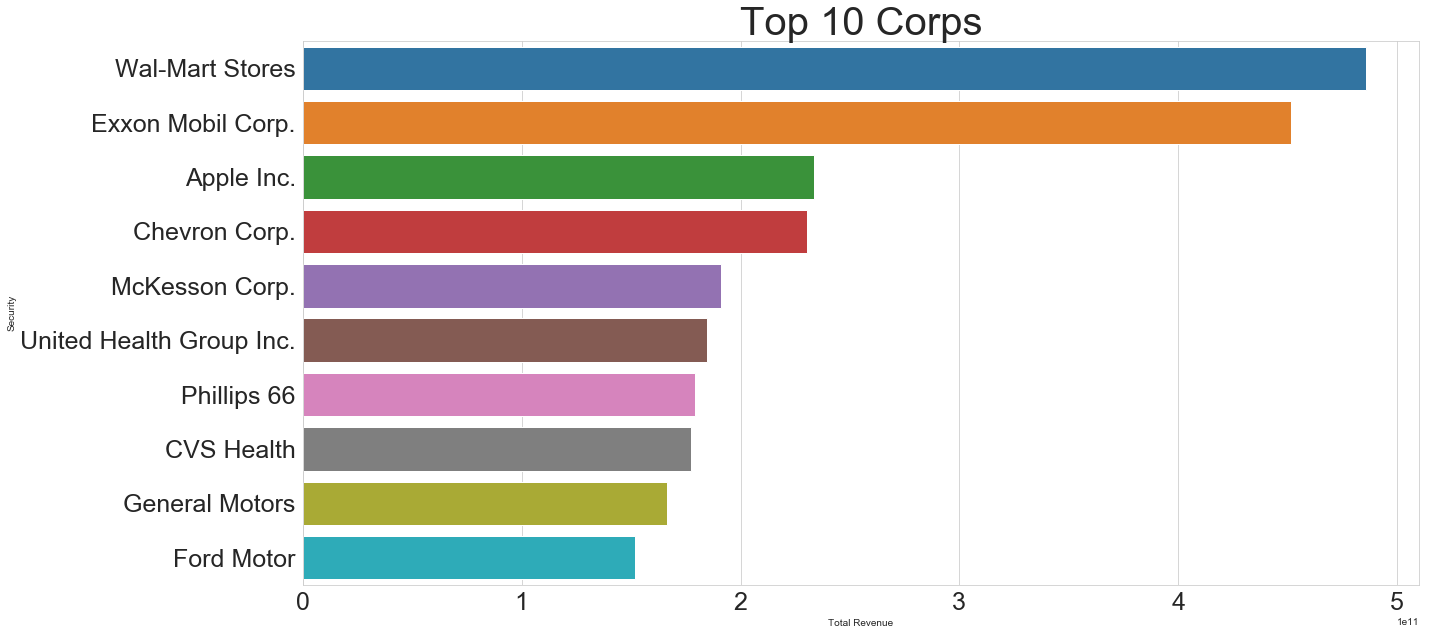

In [31]:
plt.figure(figsize=(20,10))
sns.barplot(y=top['Security'],x=top['Total Revenue'])
plt.title('Top 10 Corps',fontdict={'fontsize':40})
plt.tick_params(axis='both',labelsize=25)

In [32]:
## Top 10 as of 2016( **in terms of revenue** )

In [33]:
topfive= df1[(df1['symbol']== 'WMT')|(df1['symbol']=='XOM')|(df1['symbol']=='AAPL')|(df1['symbol']=='CVX')|(df1['symbol']=='MCK')]

In [34]:
topfive['date']=pd.to_datetime(topfive['date'])

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [55]:
Tick.rename(columns={"Ticker Symbol": "symbol"},inplace=True)

In [60]:
topfiver=topfive.merge(Tick,on='symbol')

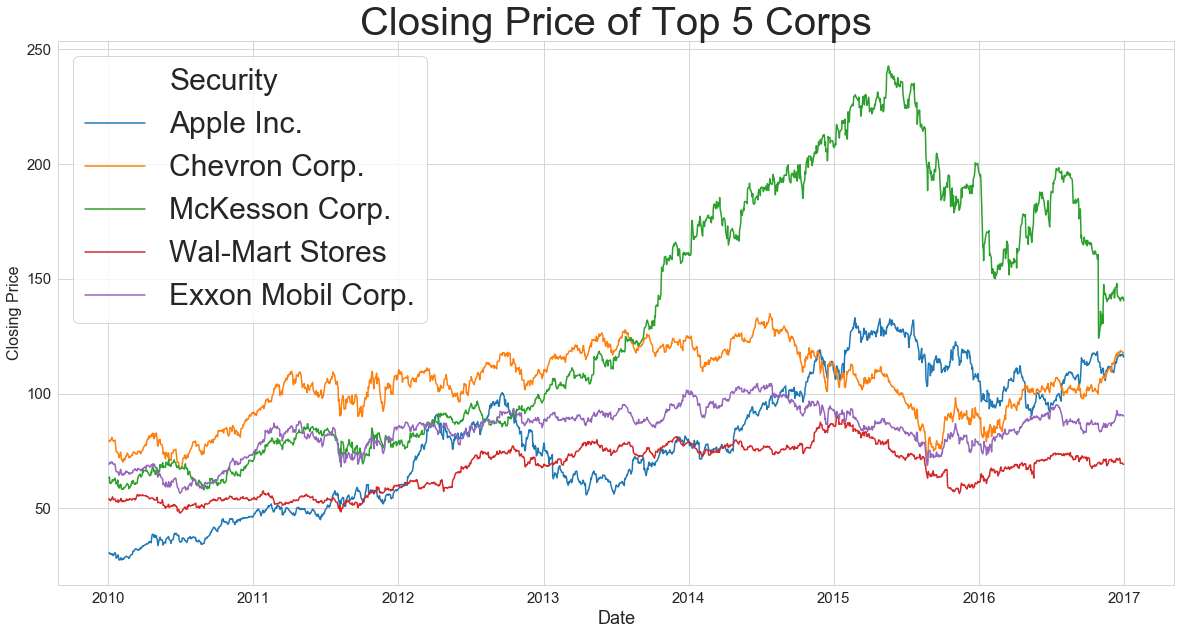

In [132]:
plt.figure(figsize=(20,10))
sns.lineplot(x='date',y='close',data=topfiver,hue='Security')
plt.title('Closing Price of Top 5 Corps',fontdict={'fontsize':40})
plt.tick_params(axis='both',labelsize=15)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price', fontsize=16)
plt.legend(prop={'size':30})

In [134]:
topfiver1 = topfiver[(topfiver['date'] > '2015-01-01')]

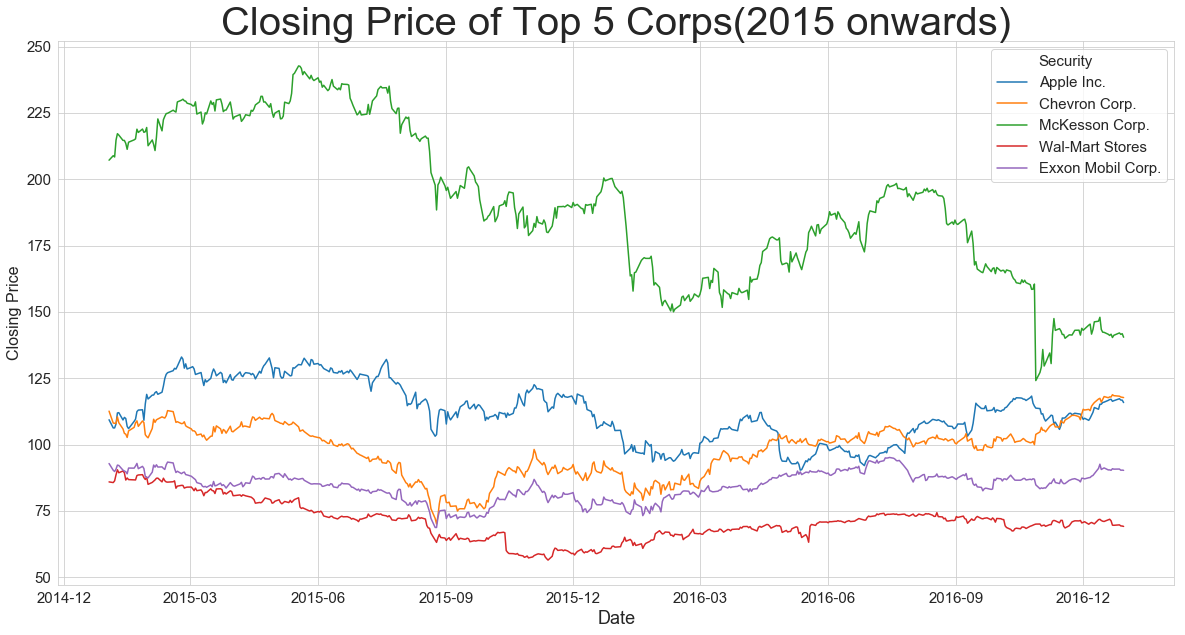

In [141]:
plt.figure(figsize=(20,10))
sns.lineplot(x='date',y='close',data=topfiver1,hue='Security')
plt.title('Closing Price of Top 5 Corps(2015 onwards)',fontdict={'fontsize':40})
plt.tick_params(axis='both',labelsize=15)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price', fontsize=16)
plt.legend(prop={'size':15})

In [ ]:
## Clearly closing prices of McKesson Corp Stand out from the rest.
## Walmart appears to have made little change since 2010
## Apple and McKesson Corp closing prices have jumped the most since 2010
## McKeson Corp however took huge hits in mid 2015, early 2016 and mid 2016

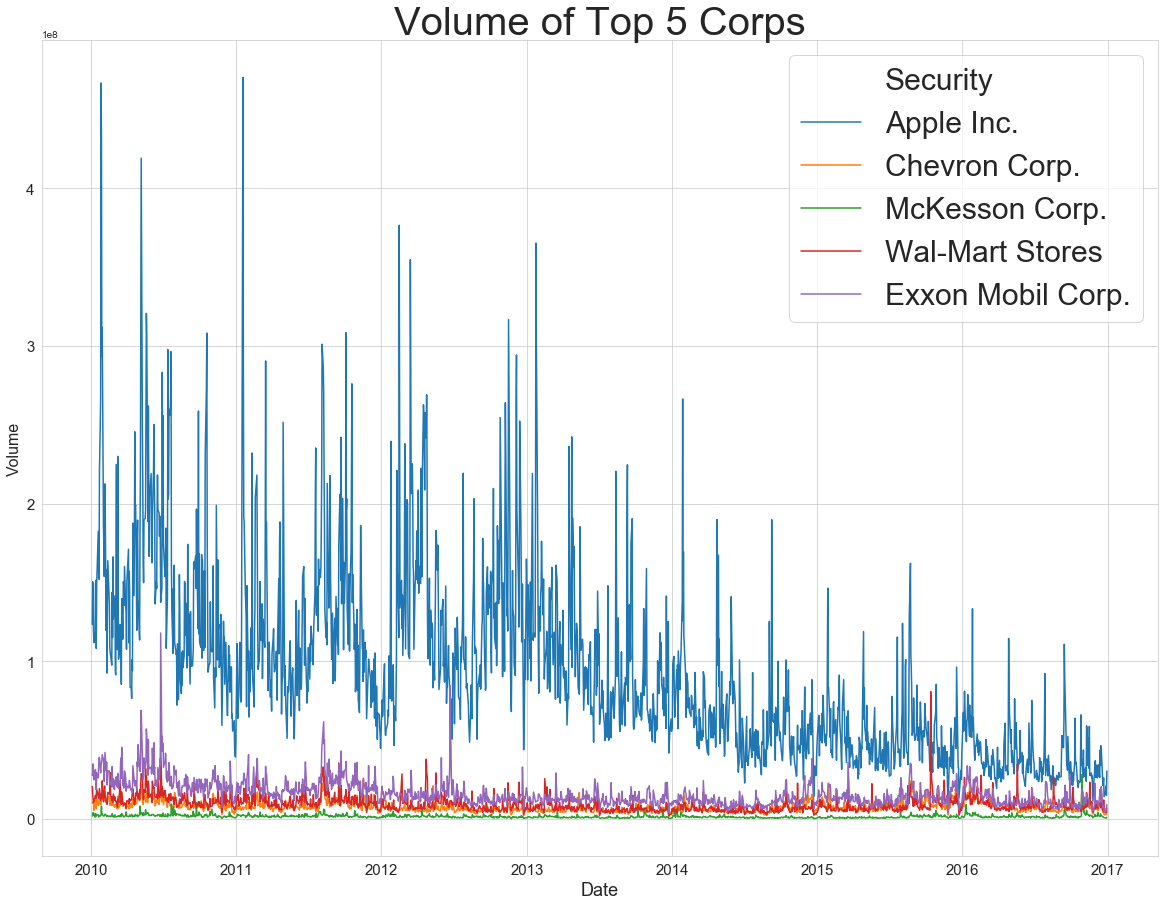

In [136]:
plt.figure(figsize=(20,15))
sns.lineplot(x='date',y='volume',data=topfiver,hue='Security')
plt.title('Volume of Top 5 Corps',fontdict={'fontsize':40})
plt.tick_params(axis='both',labelsize=15)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Volume', fontsize=16)
plt.legend(prop={'size':30})

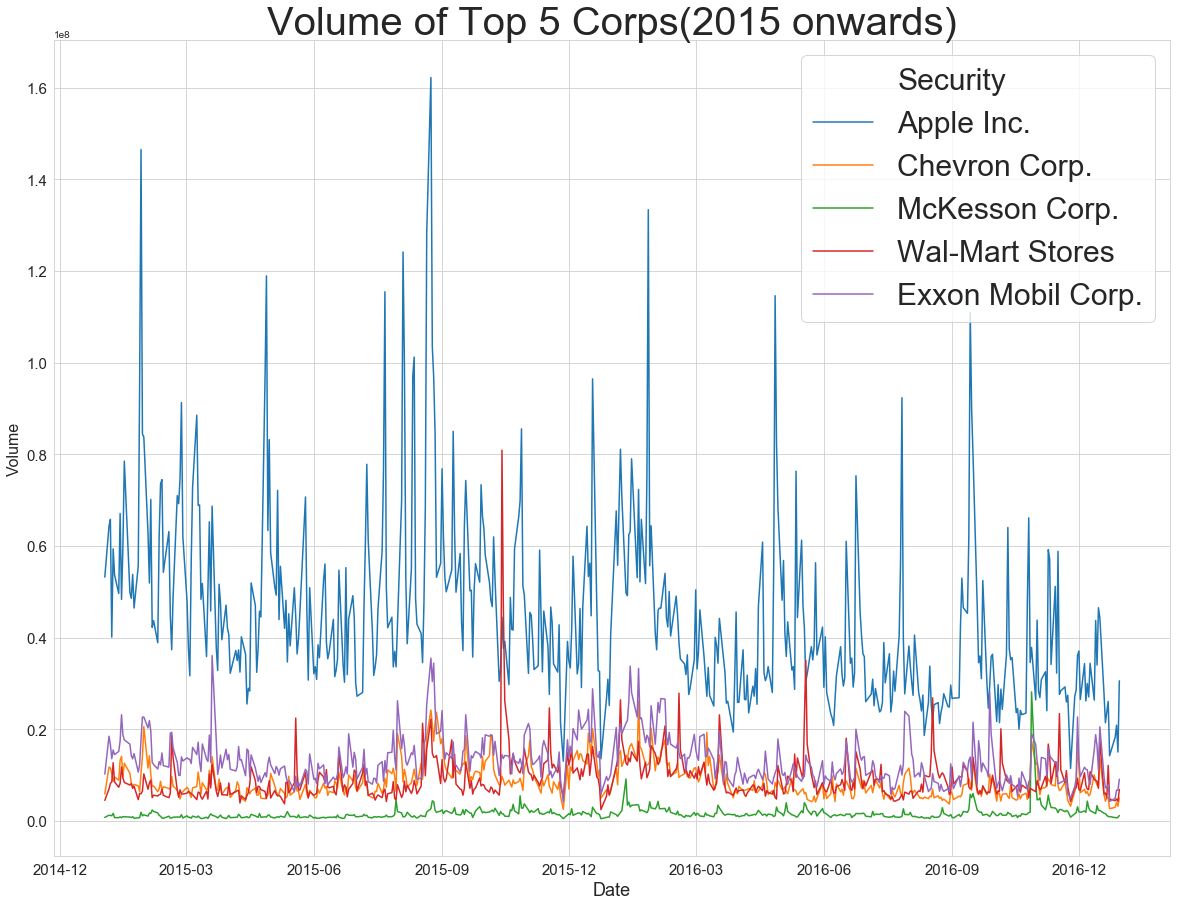

In [142]:
plt.figure(figsize=(20,15))
sns.lineplot(x='date',y='volume',data=topfiver1,hue='Security')
plt.title('Volume of Top 5 Corps(2015 onwards)',fontdict={'fontsize':40})
plt.tick_params(axis='both',labelsize=15)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Volume', fontsize=16)
plt.legend(prop={'size':30})

In [ ]:
## Apples volume( or number of shares that changed hands ) has been the most fluctuating share followed by Exxon in Purple & Walmart
## Apple volume trend shows that since 2014 the volume has been steadily decreasing in and eventually levels off in 2016-2017(in comparison to before 2016)

In [70]:
RND= df3.nlargest(50, columns='Research and Development')

In [71]:
RND1= RND[['Ticker Symbol','Research and Development']]

In [72]:
RND1.drop_duplicates('Ticker Symbol',inplace=True)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
RND1 = RND1.head(10)

In [77]:
Tick.rename(columns={"symbol": "Ticker Symbol"},inplace=True)

In [80]:
RND1=RND1.merge(Tick,on='Ticker Symbol')

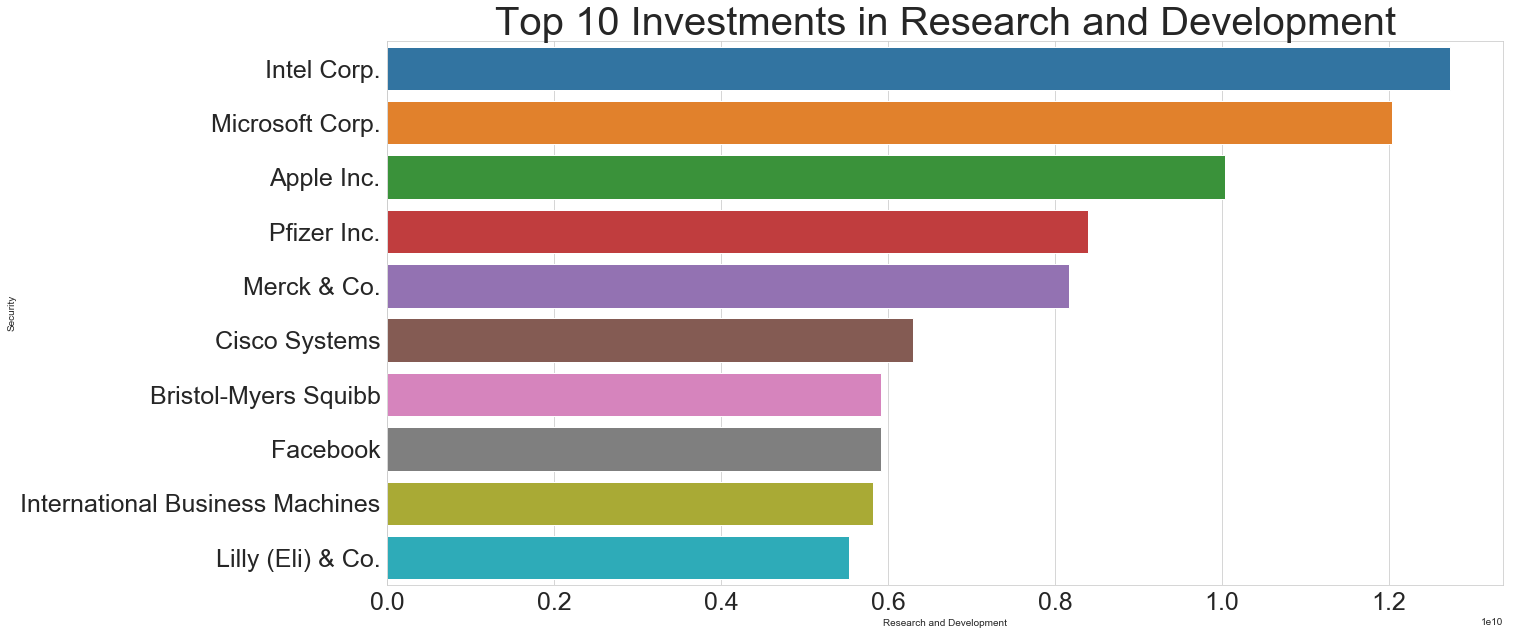

In [82]:
plt.figure(figsize=(20,10))
sns.barplot(y=RND1['Security'],x=RND1['Research and Development'])
plt.title('Top 10 Investments in Research and Development',fontdict={'fontsize':40})
plt.tick_params(axis='both',labelsize=25)

In [83]:
## Interesting to see of the top 10 most revenue creating corporations only apple makes the cut to the top 10 R n D companies
## RnD is mostly dominated by Tech companies and few Pharma based corps

In [86]:
EPS=df3.nlargest(50,columns='Earnings Per Share')

In [87]:
EPS1=EPS[['Ticker Symbol','Earnings Per Share']]

In [88]:
EPS1.drop_duplicates('Ticker Symbol',inplace=True)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [90]:
EPS1=EPS1.merge(Tick,on='Ticker Symbol')

In [95]:
EPS1=EPS1.head(10)

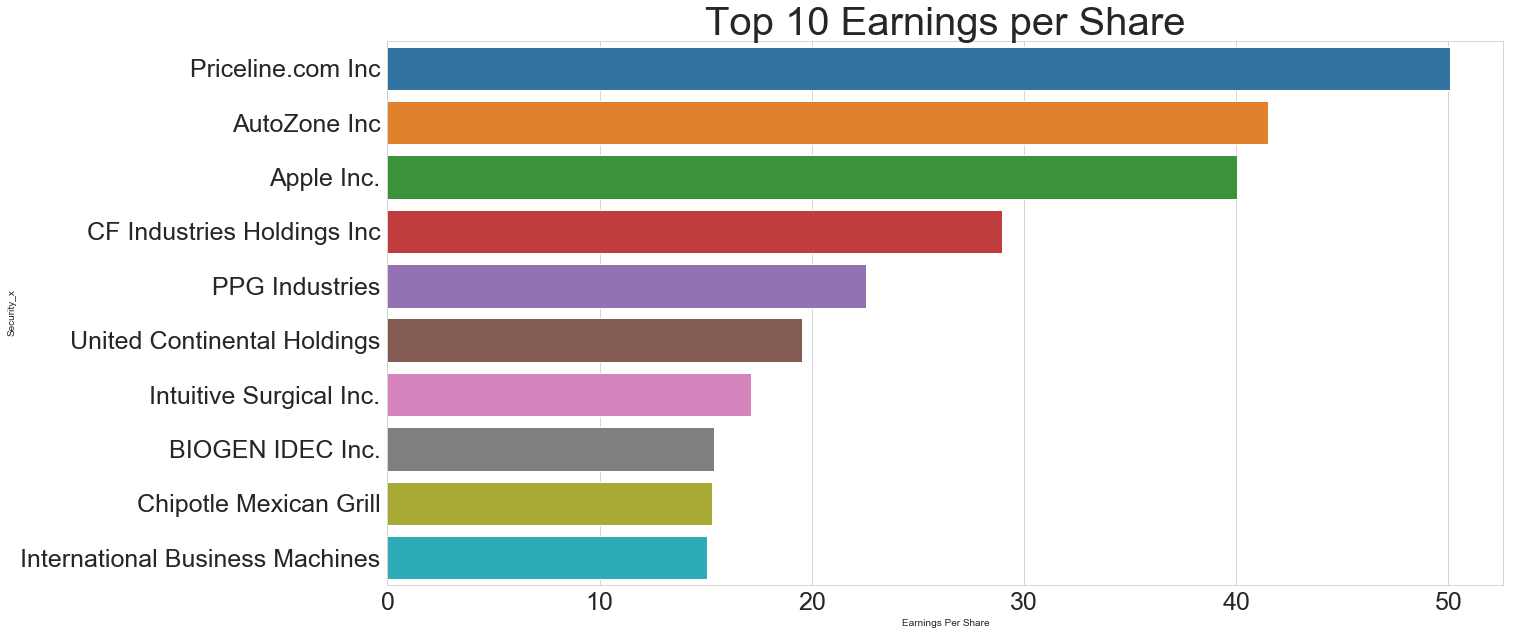

In [97]:
plt.figure(figsize=(20,10))
sns.barplot(y=EPS1['Security_x'],x=EPS1['Earnings Per Share'])
plt.title('Top 10 Earnings per Share',fontdict={'fontsize':40})
plt.tick_params(axis='both',labelsize=25)

In [98]:
## Apple again makes the cut for top 10 earnings per share

In [103]:
QR= df3.nlargest(50,columns='Quick Ratio')

In [105]:
QR=QR[['Ticker Symbol','Quick Ratio']]

In [106]:
QR.drop_duplicates('Ticker Symbol',inplace=True)

In [109]:
QR=QR.head(10)

In [111]:
QR=QR.merge(Tick,on='Ticker Symbol')

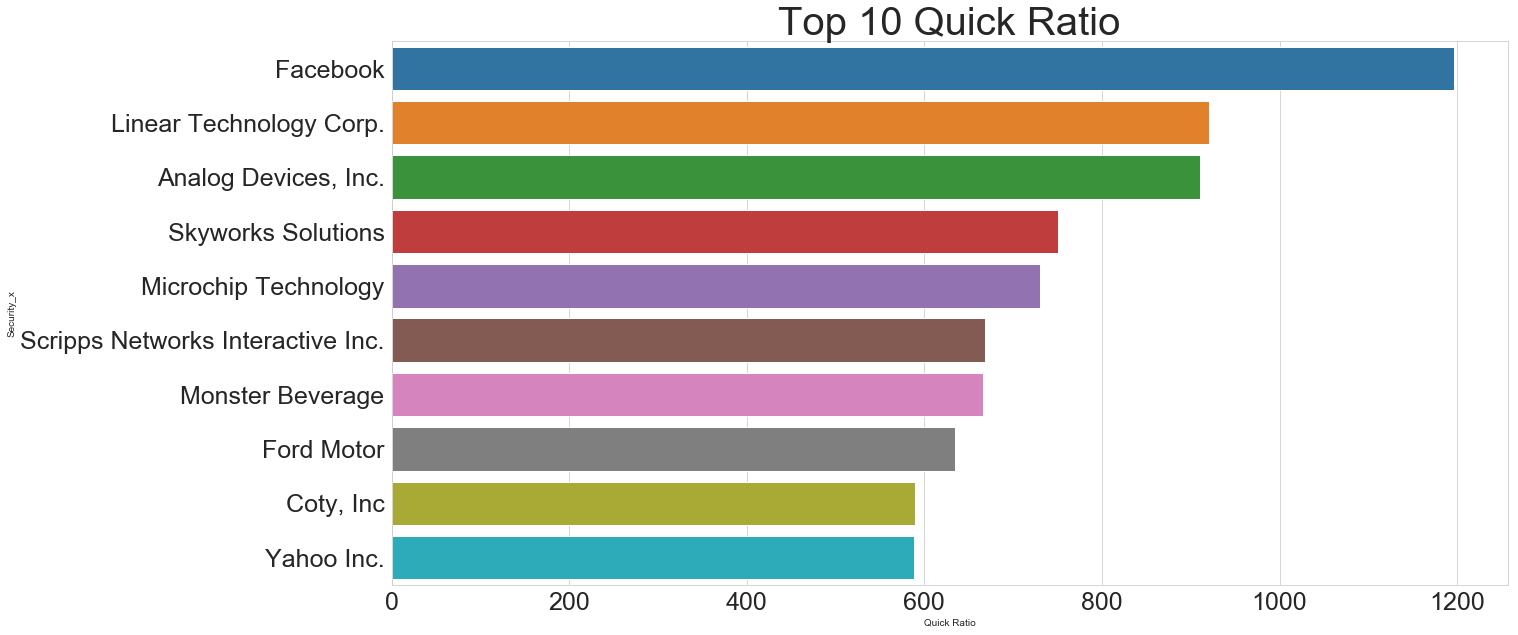

In [114]:
plt.figure(figsize=(20,10))
sns.barplot(y=QR['Security_x'],x=QR['Quick Ratio'])
plt.title('Top 10 Quick Ratio',fontdict={'fontsize':40})
plt.tick_params(axis='both',labelsize=25)

In [115]:
## Facebook appears to be the most liquid in the short term

In [127]:
HI=df1.nlargest(50000,columns='close')

In [128]:
HI=HI[['symbol','date','close']]

In [129]:
HI.drop_duplicates('symbol',inplace=True)

In [131]:
HI.head(10)

,symbol,date,close
833115,PCLN,2016-11-08,1578.130005
820799,AMZN,2016-10-05,844.359985
827464,GOOGL,2016-10-24,835.739990
796815,AZO,2016-07-28,815.979980
827463,GOOG,2016-10-24,813.109985
673713,CMG,2015-08-05,757.770020
819507,ISRG,2016-09-30,724.830017
673999,REGN,2015-08-05,592.400024
626677,BIIB,2015-03-20,475.980011
833079,MTD,2016-11-08,429.910004


In [ ]:
## TOP 10 highest closing prices recorded. 8/10 in 2016.